## Problem Set 1
Group 23


In [121]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EXERCISE 1

Solving the following SDE:
$$ \frac{dS_t}{S_t} = \mu dt + \sigma dz_t $$
We ge the following solution :
$$ S_t = S_0e^{\mu t - \frac{1}{2}\sigma^2 t + \sigma z_t}$$
Then we simulate the share price according to the solution of the SDE.

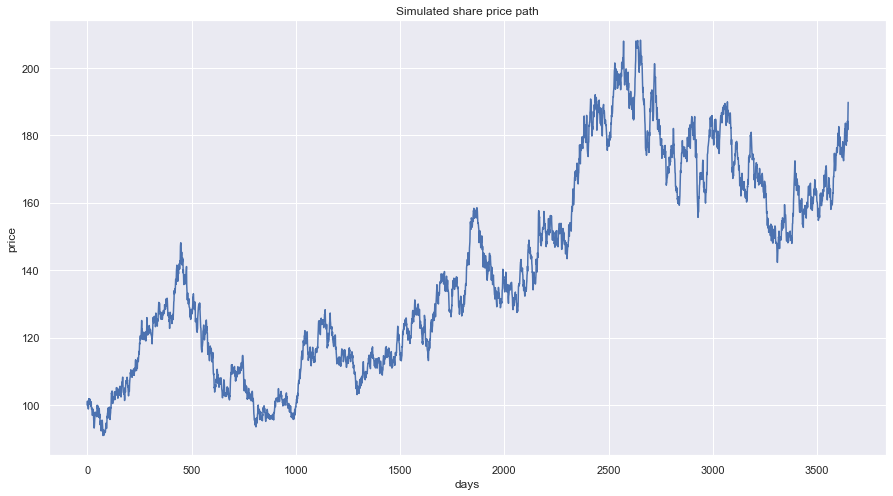

In [122]:

S0=100
mu=0.06
sigma=0.2
dt=1/365
T=3650
Z=np.random.standard_normal(T).cumsum()
t=np.arange(T)/365
S=S0*np.exp(mu*t-sigma**2*t/2+sigma*np.sqrt(dt)*Z)

## Presets for plot
sns.set(rc={'figure.figsize':(15,8)})

plt.plot(S)
plt.xlabel("days")
plt.ylabel("price")
plt.title('Simulated share price path')
plt.show()

We computed the simple return $\textit R$ and then we transform them in continuously compounded return  $\textit r$

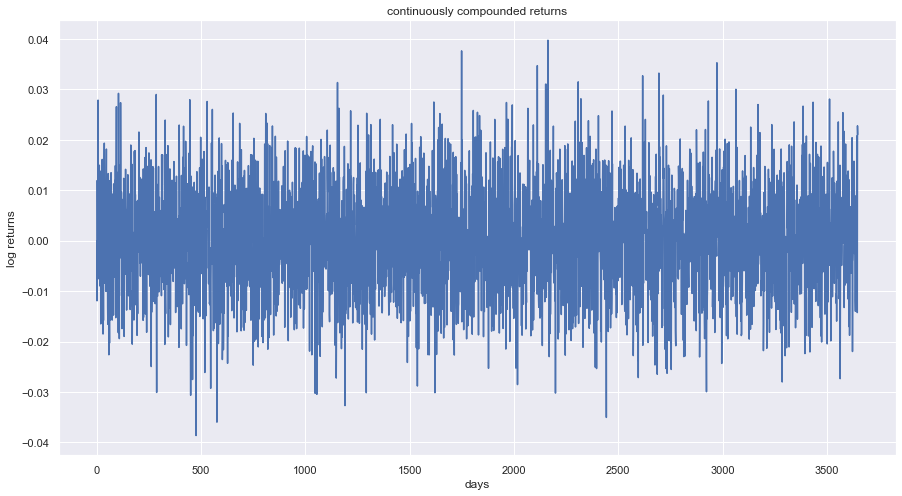

In [123]:
R=(S[1:]-S[:-1])/S[:-1];
r=np.log(1+R)
plt.plot(r)
plt.xlabel("days")
plt.ylabel("log returns")
plt.title('continuously compounded returns')
plt.show()

We printed the annualized mean and the standard deviation

In [124]:
print("annualized mean : ", 365*np.mean(r))
print("annualized standard deviation : " , np.sqrt(365)*np.std(r))

annualized mean :  0.06410969626937836
annualized standard deviation :  0.20208313234443676


EXERCISE 2

Using the solution founded in exercise 1 we simulated share prices from $1950/01/01$ to $2020/12/31$ 

number of observations :  25933


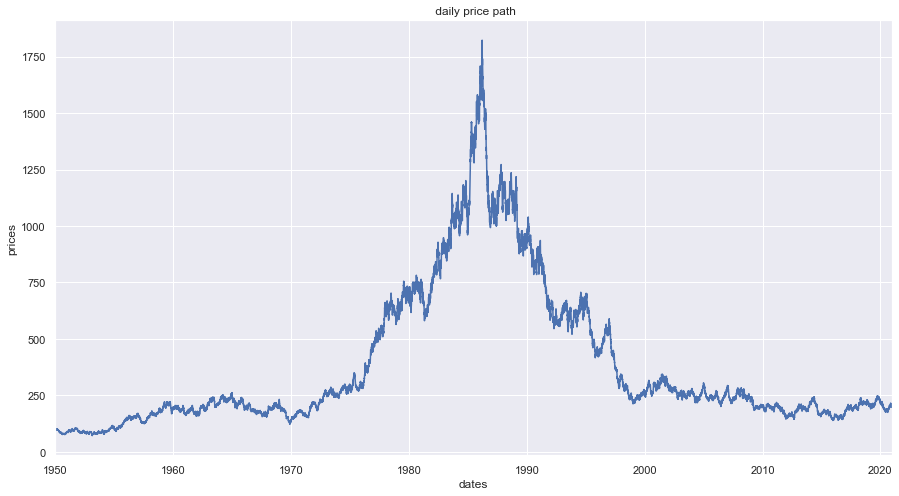

In [125]:
start='1950-01-01'
end='2020-12-31'
dates=pd.period_range(start,end,freq='D')
T=len(dates)
Z=np.random.standard_normal(T).cumsum()
t=np.arange(T)/365
S=S0*np.exp(mu*t-sigma**2*t/2+sigma*np.sqrt(dt)*Z)

#We store prices into a pd.series
prices=pd.Series(S,dates)
print("number of observations : ",len(dates)) 

#plot
prices.plot()
plt.title(" daily price path")
plt.xlabel("dates")
plt.ylabel("prices")
plt.show()

We created a new series of monthly average share price using the resample command

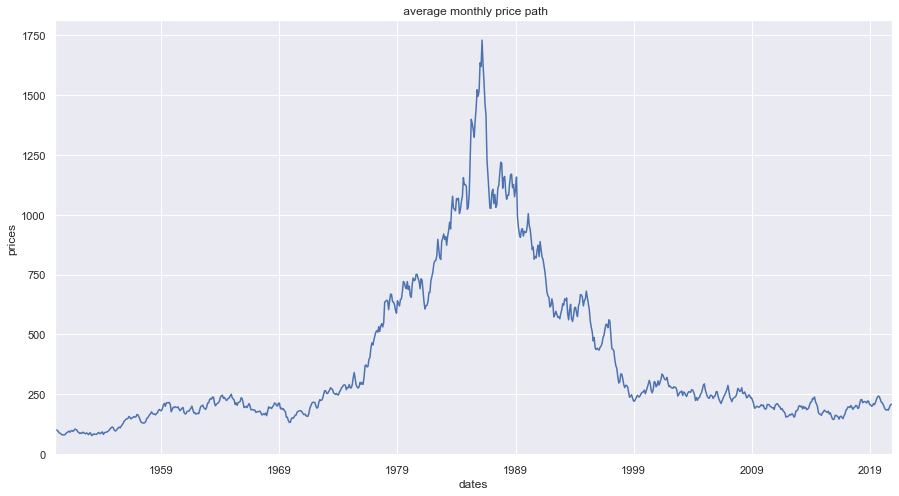

In [126]:
#monthly distribution
m_prices=prices.resample('M').mean()
m_prices.plot()

#plot
plt.title(" average monthly price path")
plt.xlabel("dates")
plt.ylabel("prices")
plt.show()

EXERCISE 3

We created the continuously coumpounded return according to different frequencies and we store the results in pd.series.<p>
We decided to use last, since weekly and monthly returns are compounded taking into account the last value of the period.

In [127]:
#daily log returns
R_d=(prices.values[1:]-prices.values[:-1])/prices.values[:-1]
r_d=np.log(1+R_d)
r_d=pd.Series(r_d,prices.index[1:])
print("summary statistics of daily log returns: \n",r_d.describe())

#weekly log returns
w_prices=prices.resample('W').last()
R_w=(w_prices.values[1:]-w_prices.values[:-1])/w_prices.values[:-1]
r_w=np.log(1+R_w)
r_w=pd.Series(r_w,w_prices.index[1:])
print("summary statistics of weekly log returns: \n",r_w.describe())

#monthly log returns
mon_prices=prices.resample('M').last()
R_mon=(mon_prices.values[1:]-mon_prices.values[:-1])/mon_prices.values[:-1]
r_mon=np.log(1+R_mon)
r_mon=pd.Series(r_mon,mon_prices.index[1:])
print("summary statistics of monthly log returns: \n ",r_mon.describe())



summary statistics of daily log returns: 
 count    25932.000000
mean         0.000029
std          0.010393
min         -0.041271
25%         -0.007014
50%          0.000059
75%          0.006960
max          0.042922
dtype: float64
summary statistics of weekly log returns: 
 count    3705.000000
mean        0.000200
std         0.027798
min        -0.103324
25%        -0.018636
50%         0.000556
75%         0.018447
max         0.101531
dtype: float64
summary statistics of monthly log returns: 
  count    851.000000
mean       0.000873
std        0.059571
min       -0.202340
25%       -0.038337
50%        0.003918
75%        0.041175
max        0.183483
dtype: float64


For each frequency we computed the annualized mean and standard deviation of log returns

In [128]:
#daily return
ann_mean_d=r_d.mean()*365
ann_std_d=r_d.std()*np.sqrt(365)
print("daily annualized mean : ",ann_mean_d)
print("daily annualized standard deviation : ",ann_std_d)

#weekly return
ann_mean_w=r_w.mean()*52
ann_std_w=r_w.std()*np.sqrt(52)
print("weekly annualized mean : ",ann_mean_w)
print("weekly annualized standard deviation : ", ann_std_w)

#monthly return
ann_mean_m=r_mon.mean()*12
ann_std_m=r_mon.std()*np.sqrt(12)
print("monthly annualized mean : ",ann_mean_m)
print("monthly annualized standard deviation : ",ann_std_m)


daily annualized mean :  0.010404631052665958
daily annualized standard deviation :  0.1985523375202001
weekly annualized mean :  0.010374924968333853
weekly annualized standard deviation :  0.20045780423702927
monthly annualized mean :  0.010473124104622995
monthly annualized standard deviation :  0.20636119552669965


For each frequency we plotted the time series of annualized mean and std deviation of log returns using a rolling window of one year

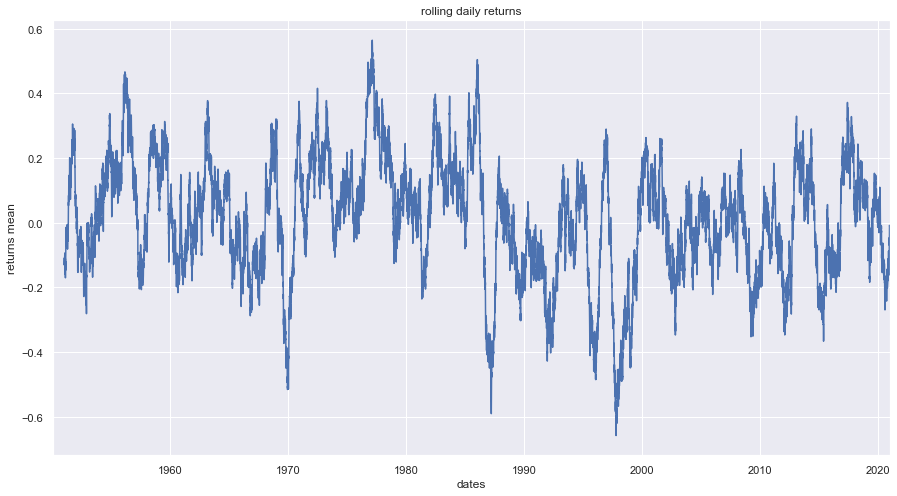

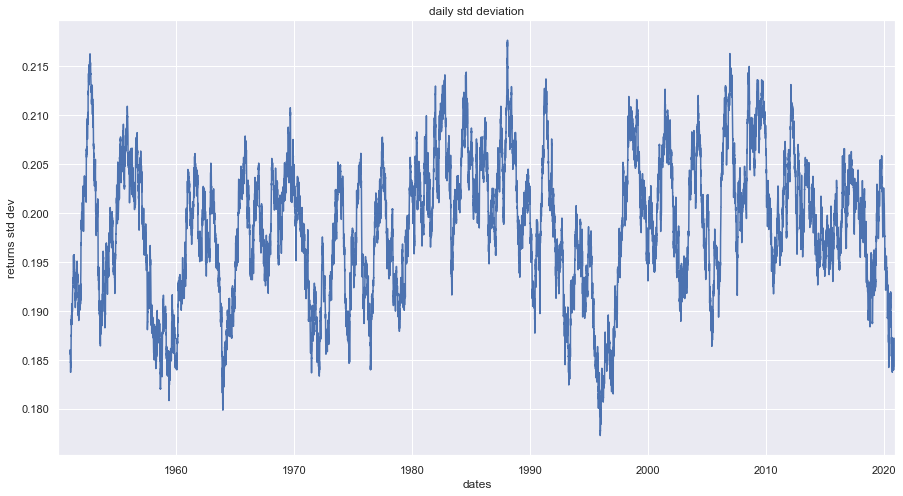

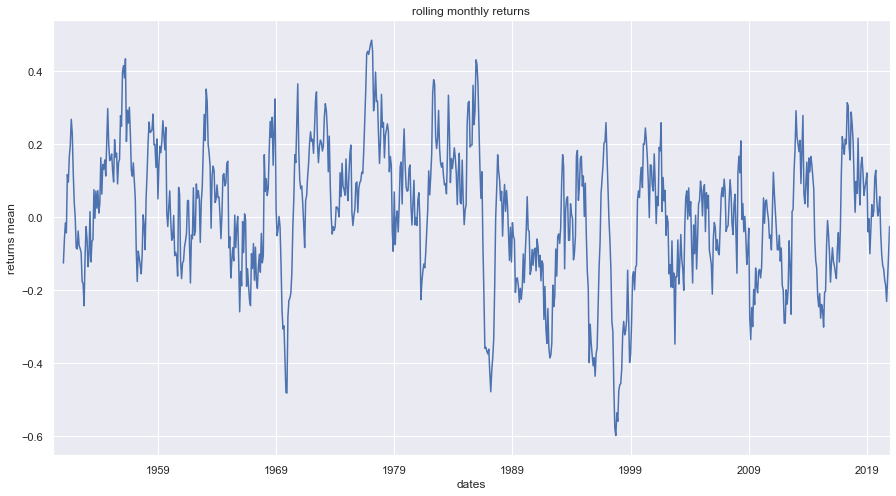

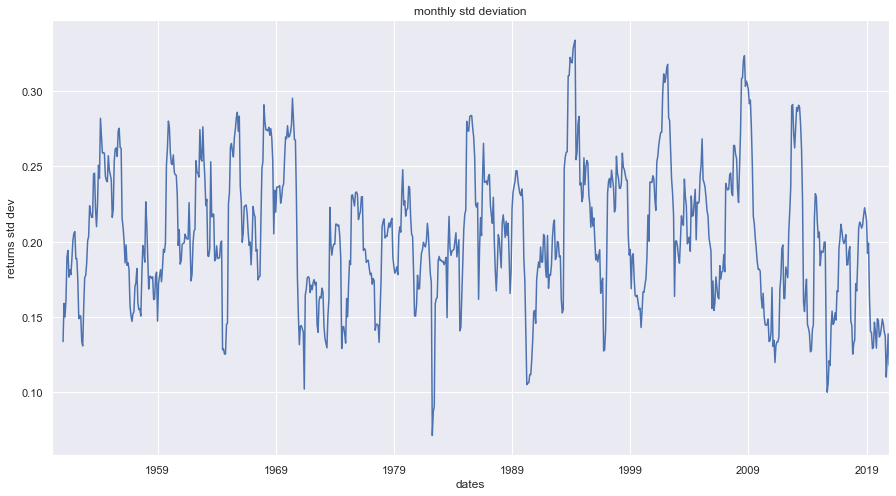

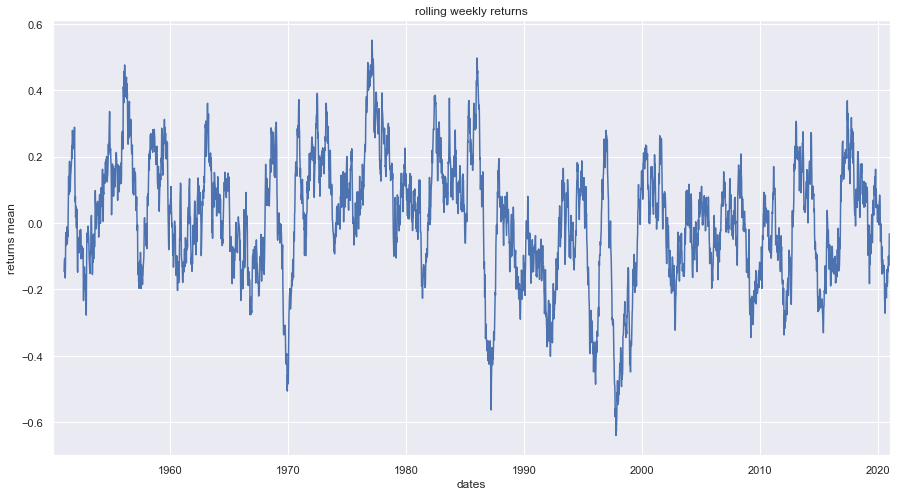

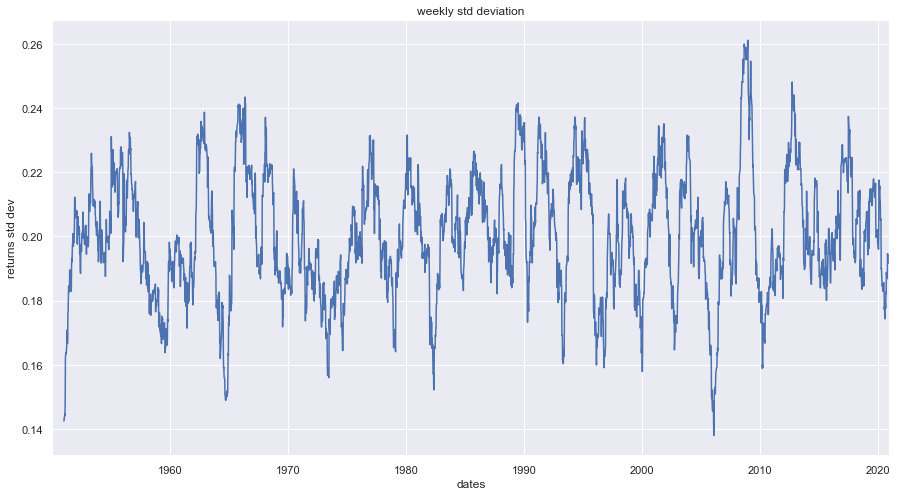

In [129]:
# rolling values of daily returns
one_y_mean_d=r_d.rolling(365).mean()*365
one_y_std_d=r_d.rolling(365).std()*np.sqrt(365)
one_y_mean_d.plot()
plt.title("rolling daily returns")
plt.xlabel("dates")
plt.ylabel("returns mean")
plt.show()
one_y_std_d.plot()
plt.title("daily std deviation")
plt.xlabel("dates")
plt.ylabel("returns std dev")
plt.show()

# rolling values of monthly returns
one_y_mean_m=r_mon.rolling(12).mean()*12
one_y_std_m=r_mon.rolling(12).std()*np.sqrt(12)
one_y_mean_m.plot()
plt.title("rolling monthly returns")
plt.xlabel("dates")
plt.ylabel("returns mean")
plt.show()
one_y_std_m.plot()
plt.title("monthly std deviation")
plt.xlabel("dates")
plt.ylabel("returns std dev")
plt.show()

# rolling values of weekly returns
one_y_mean_w=r_w.rolling(52).mean()*52
one_y_std_w=r_w.rolling(52).std()*np.sqrt(52)
one_y_mean_w.plot()
plt.title("rolling weekly returns")
plt.xlabel("dates")
plt.ylabel("returns mean")
plt.show()
one_y_std_w.plot()
plt.title("weekly std deviation")
plt.xlabel("dates")
plt.ylabel("returns std dev")
plt.show()

The average values of log returns are close for all three time frenquencies since the monthly and weekly log returns are the sum of daily returns over a 30 and 7 days period and the mean is linear. The values of the rolling mean change a lot during the time.  <P>
The variation in the volatility of log returns over 1-yr rolling period is the highest for monthly sampling and the lowest for daily sampling. This is reasonable since the higher is the number of observation in the 1-yr rolling window, the smaller is its flactuation around the real value.

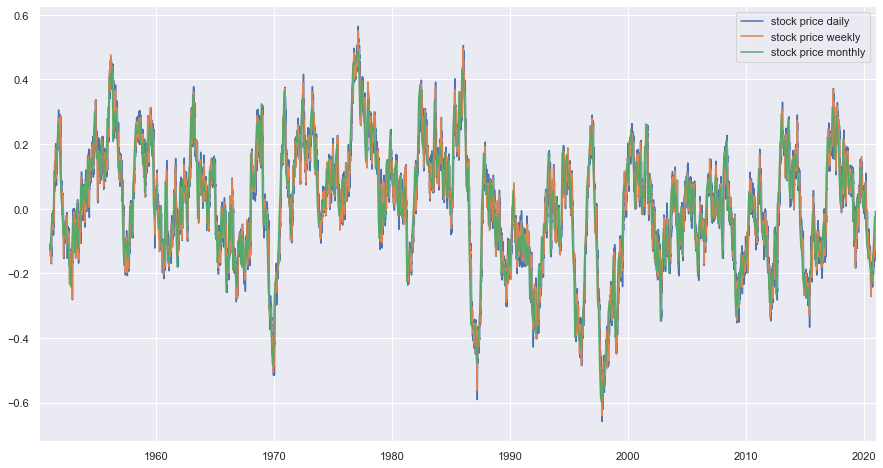

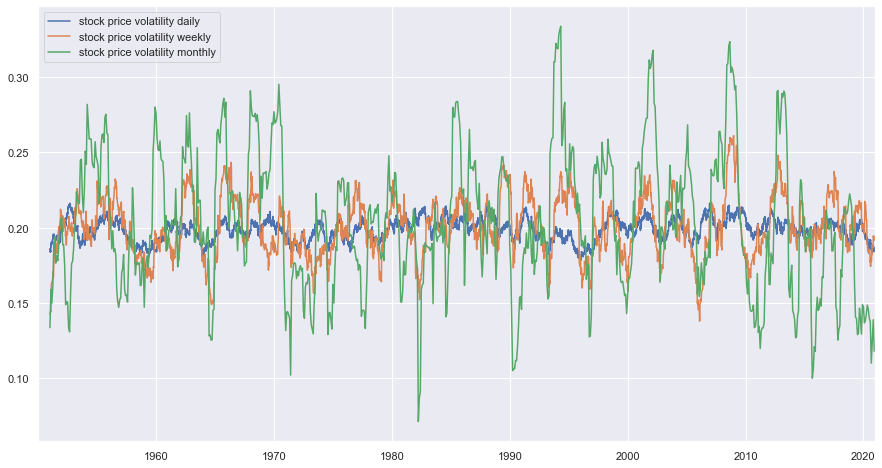

In [130]:
#comparison among mean
one_y_mean_d.plot(label='stock price daily')
one_y_mean_w.plot(label="stock price weekly")
one_y_mean_m.plot(label="stock price monthly")
plt.legend()
plt.show()

#plot the series avg
one_y_std_d.plot(label='stock price volatility daily')
one_y_std_w.plot(label="stock price volatility weekly")
one_y_std_m.plot(label="stock price volatility monthly")
plt.legend()
plt.show()

We estimated first and second moment of the mean and variance estimators.
The first moment of the mean estimatore is quite far from the real value, which is the drift term $\mu$ in the differential equation since stocks are a geometric brownian motion. It testifies how difficult it is to find a good estimator for the return mean.
Given an high variance, it changes a lot depending on the simulation.<p>
On the other hand the variance estimator has a mean really close to the real one that is $\sigma^2$ in the geometric brownian motion and its variance is close to 0, especially for the daily returns. This results lead to the conclusion that variance estimator performs well even if the estimator is not unbiased.  

In [131]:

ts_ann_mean=r_d.resample('Y').mean()*365
squared_r_d=np.square(r_d)
ts_ann_var=squared_r_d.resample('Y').mean()*365
print("mean of daily mean estimator : ",ts_ann_mean.mean())
print("variance of daily mean estimator : ",ts_ann_mean.var())
print("mean of daily variance estimator : ",ts_ann_var.mean())
print("variance of daily variance estimator : ",ts_ann_var.var())

ts_ann_mean_m=r_mon.resample('Y').mean()*12
squared_r_mon=np.square(r_mon)
ts_ann_var_m=squared_r_mon.resample('Y').mean()*12
print("mean of monthly mean estimator : ",ts_ann_mean_m.mean())
print("variance of monthly mean estimator : ",ts_ann_mean_m.var())
print("mean of monthly variance estimator : ",ts_ann_var_m.mean())
print("variance of monthly variance estimator : ",ts_ann_var_m.var())



mean of daily mean estimator :  0.010342860077540284
variance of daily mean estimator :  0.04148150716197322
mean of daily variance estimator :  0.03942152321087397
variance of daily variance estimator :  8.400638480572868e-06
mean of monthly mean estimator :  0.010278549523487552
variance of monthly mean estimator :  0.041568984263015474
mean of monthly variance estimator :  0.0425163602722195
variance of monthly variance estimator :  0.0003740456373257689


EXERCISE 4

In [132]:
import wrds 
import psycopg2
db=wrds.Connection(wrds_username='sansonet')

Loading library list...
Done


We downloaded the data doing a query

In [133]:
df=db.raw_sql("select date, ret from crsp.dsf where permco in (7,35048,8048,21446,20792) and date>='2001-01-01' and date<='2020-12-31'")
df

,date,ret
0,2001-01-02,0.000000
1,2001-01-03,0.100840
2,2001-01-04,0.041985
3,2001-01-05,-0.040293
4,2001-01-08,0.011450
...,...,...
25155,2020-12-24,-0.001131
25156,2020-12-28,0.013390
25157,2020-12-29,-0.006086
25158,2020-12-30,0.005581


We saved the dataframe into a csv file and then we read it again

In [134]:
#load file
df.to_csv('HDF5.csv')
#read file
HDF5=pd.read_csv('HDF5.csv',index_col='date')


We downloaded the returns of the five firms singularly and we created a dataframe

In [135]:
aapl=db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='2001-01-01' and date<='2020-12-31'")
aapl=aapl.rename(index=aapl["date"], columns={"ret": "AAPL"})
gs=db.raw_sql("select date, ret from crsp.dsf where permco in (35048) and date>='2001-01-01' and date<='2020-12-31'")
gs=gs.rename(index=gs["date"], columns={"ret": "GS"})
msft=db.raw_sql("select date, ret from crsp.dsf where permco in (8048) and date>='2001-01-01' and date<='2020-12-31'")
msft=msft.rename(index=msft["date"], columns={"ret": "MSFT"})
pg=db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='2001-01-01' and date<='2020-12-31'")
pg=pg.rename(index=pg["date"], columns={"ret": "PG"})
ge=db.raw_sql("select date, ret from crsp.dsf where permco in (20792) and date>='2001-01-01' and date<='2020-12-31'")
ge=ge.rename(index=ge["date"], columns={"ret": "GE"})


In [136]:
#merge the data into a unique dataframe
data=pd.merge(aapl,gs,on="date")
data=pd.merge(data,msft,on="date")
data=pd.merge(data,pg,on="date")
data=pd.merge(data,ge,on="date")

#set the data as index
data.set_index("date",inplace=True)
data.index=pd.to_datetime(data.index,format="%Y-%m-%d")
#log return
logd=np.log(1+data)
#monthly and weekly log return
logm=logd.resample('M').sum()
logw=logd.resample('W').sum()

We computed summary statistics for each frequency

In [137]:
logd.describe()

,AAPL,GS,MSFT,PG,GE
count,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000
mean,0.001264,0.000227,0.000552,0.000360,-0.000174
std,0.023160,0.022636,0.018260,0.011855,0.021047
min,-0.197470,-0.210223,-0.159453,-0.091428,-0.164394
25%,-0.009671,-0.009845,-0.007782,-0.005020,-0.008503
50%,0.000949,0.000338,0.000380,0.000373,0.000000
75%,0.012613,0.010664,0.008922,0.005958,0.008369
max,0.130194,0.234818,0.170626,0.113409,0.179844


In [138]:
logw.describe()

,AAPL,GS,MSFT,PG,GE
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.006093,0.001093,0.002660,0.001733,-0.000840
std,0.048623,0.047955,0.036033,0.024282,0.044965
min,-0.278471,-0.365644,-0.202276,-0.175977,-0.228878
25%,-0.021377,-0.022739,-0.015774,-0.009632,-0.019232
50%,0.007991,0.003369,0.002402,0.002299,-0.000332
75%,0.034839,0.025474,0.021760,0.014667,0.020817
max,0.236207,0.393197,0.149357,0.122933,0.309399


In [139]:
logm.describe()

,AAPL,GS,MSFT,PG,GE
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.026506,0.004755,0.011572,0.007539,-0.003653
std,0.104228,0.086716,0.071370,0.042712,0.087544
min,-0.399818,-0.321603,-0.178358,-0.123464,-0.324090
25%,-0.032266,-0.050857,-0.035418,-0.018831,-0.045241
50%,0.041959,0.015309,0.019096,0.009014,-0.004021
75%,0.093735,0.056736,0.053374,0.034200,0.043124
max,0.374168,0.210329,0.342015,0.112685,0.316246


In [140]:
#using number of trading days in a year
#daily
ann_meand=logd.mean()*252
ann_stdd=logd.std()*np.sqrt(252)
print("annualized mean of daily log return : \n", ann_meand)
print("annualized standard deviation of daily log return :\n ", ann_stdd)

annualized mean of daily log return : 
 AAPL    0.318583
GS      0.057156
MSFT    0.139083
PG      0.090608
GE     -0.043903
dtype: float64
annualized standard deviation of daily log return :
  AAPL    0.367651
GS      0.359328
MSFT    0.289865
PG      0.188197
GE      0.334105
dtype: float64


In [141]:
ann_meanw=logw.mean()*52
ann_stdw=logw.std()*np.sqrt(52)
print("annualized mean of weekly log return : \n", ann_meanw)
print("annualized standard deviation of weekly log return : \n", ann_stdw)

annualized mean of weekly log return : 
 AAPL    0.316859
GS      0.056847
MSFT    0.138331
PG      0.090117
GE     -0.043665
dtype: float64
annualized standard deviation of weekly log return : 
 AAPL    0.350626
GS      0.345806
MSFT    0.259841
PG      0.175102
GE      0.324248
dtype: float64


In [142]:
ann_meanm=logm.mean()*12
ann_stdm=logm.std()*np.sqrt(12)
print("annualized mean of weekly log return : \n", ann_meanm)
print("annualized standard deviation of weekly log return : \n", ann_stdm)

annualized mean of weekly log return : 
 AAPL    0.318078
GS      0.057066
MSFT    0.138863
PG      0.090464
GE     -0.043833
dtype: float64
annualized standard deviation of weekly log return : 
 AAPL    0.361058
GS      0.300392
MSFT    0.247232
PG      0.147960
GE      0.303260
dtype: float64


We plot the annualized mean and standard deviation of log returns using a rolling 1-yr window for each frequency

<Figure size 1080x576 with 0 Axes>

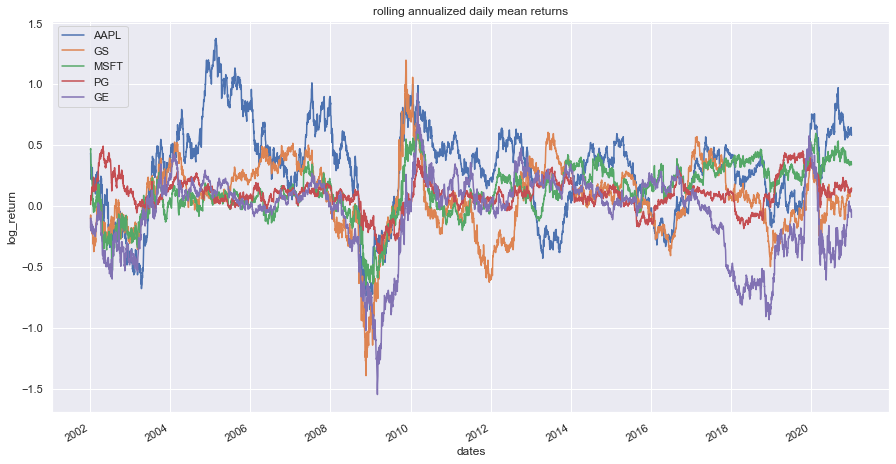

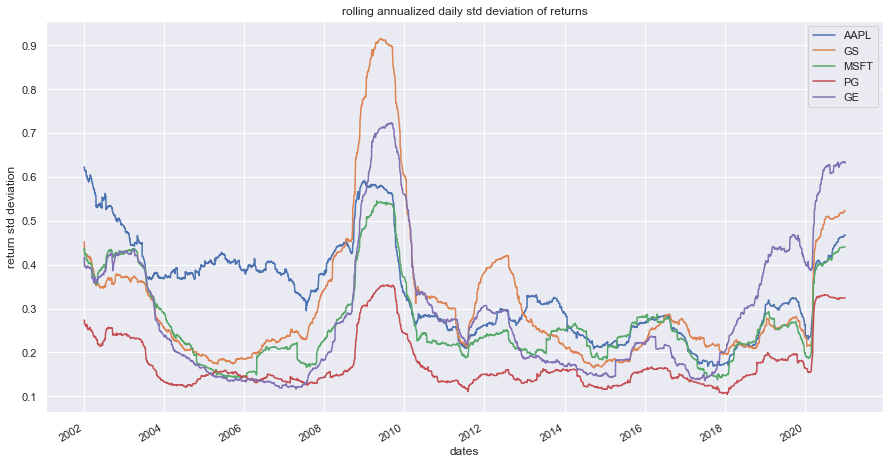

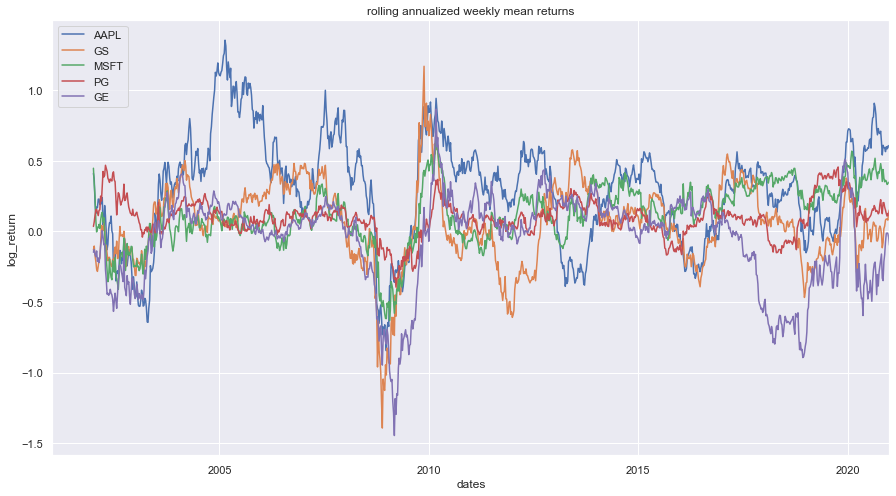

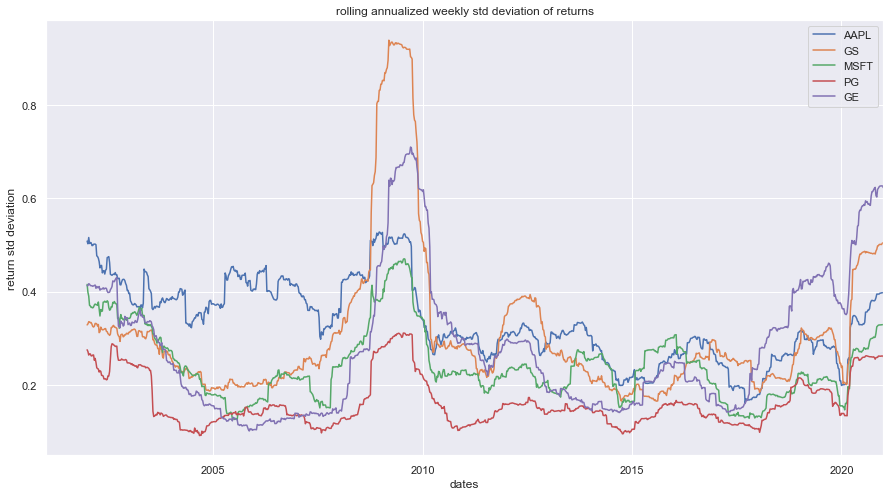

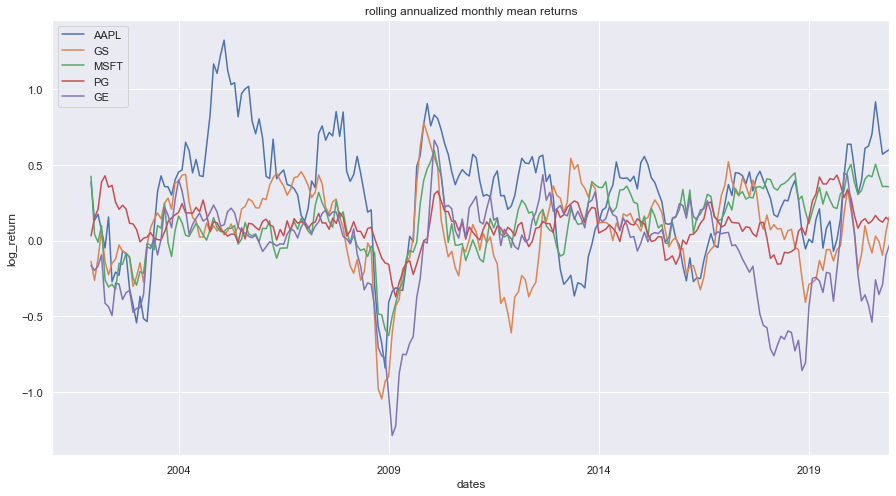

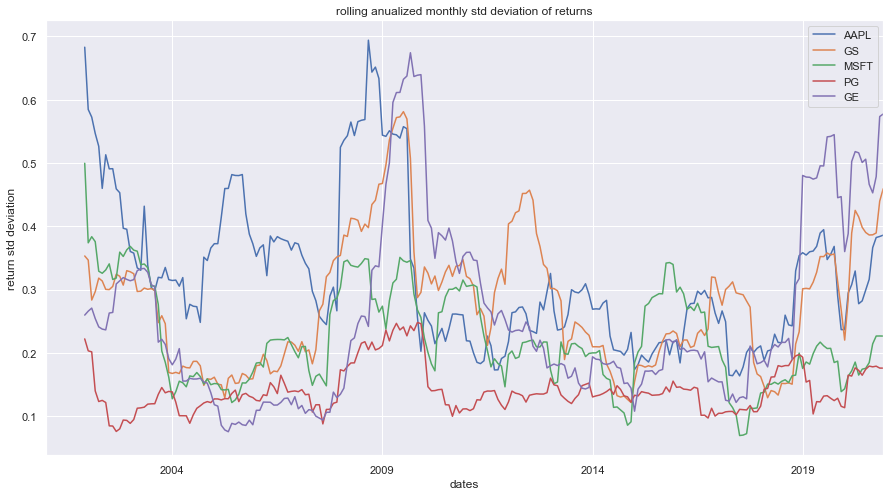

In [147]:
#daily
oney_mean_d=logd.rolling(252).mean()*252
oney_std_d=logd.rolling(252).std()*np.sqrt(252)
plt.figure()
oney_mean_d.plot()
plt.title("rolling annualized daily mean returns")
plt.xlabel("dates")
plt.ylabel("log_return")
plt.show()
oney_std_d.plot()
plt.title("rolling annualized daily std deviation of returns")
plt.xlabel("dates")
plt.ylabel("return std deviation")
plt.show()

#weekly
oney_mean_w=logw.rolling(52).mean()*52
oney_std_w=logw.rolling(52).std()*np.sqrt(52)
oney_mean_w.plot()
plt.title("rolling annualized weekly mean returns")
plt.xlabel("dates")
plt.ylabel("log_return")
plt.show()
oney_std_w.plot()
plt.title("rolling annualized weekly std deviation of returns")
plt.xlabel("dates")
plt.ylabel("return std deviation")
plt.show()

#monthly
oney_mean_m=logm.rolling(12).mean()*12
oney_std_m=logm.rolling(12).std()*np.sqrt(12)
oney_mean_m.plot()
plt.title("rolling annualized monthly mean returns")
plt.xlabel("dates")
plt.ylabel("log_return")
plt.show()
oney_std_m.plot()
plt.title("rolling anualized monthly std deviation of returns")
plt.xlabel("dates")
plt.ylabel("return std deviation")
plt.show()

QUESTION F

The means of log returns are similar for all the times samples. We expect this behaviour because monthly and weekly log returns are the sum of daily returns over a 30 and 7 days period and the mean is linear. The evolution of the means' simulated returns is similar to the real ones. <P>
The volatility does not strongly depend on the time frequency, there is a difference across stocks, but in general the stock's volatility is similar over the time samples. This pattern is not the same if compared to the simulated data of previous exercise, a possible reason could be the volatility clustering of the returns. In our simulated data we assumed constant volatility, this assumption does not hold in real data.

QUESTION G

During the pandemic the main consequence of the shock is the sharp increase in volatility. Generally speaking volatility increases during bad periods because the market becomes uncertain.<p>
The behaviour of returns is more diversied across firms, the returns' mean are negatively affected but the severity of drop depends on the firm, however all stocks seems to bounce back after the initial loss, probably due to the central bank's measures.<p>
It is possible to observe in the data the financial crisis of 2009, during this period the volatility increased slightly more than in 2020, however what comes to eyes is the stronger effect of the shock on the mean returns, all stocks were affected by the drop in the market.